Code Casa - Project 1

STOCK PRICES PREDICTOR USING ML

I used Decision Tree (Classification) to predict buy or sell signals. Sell = 0, Buy = 1.

Also I used Apple Stock dataset.

Fares Yassen

# Importing important libraries & packages

In [1]:
import yfinance as yf
import datetime
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

start = datetime.datetime(2010,1,1)
end = datetime.datetime.now()

# Downloading the Data

In [2]:
df = yf.download('AAPL', start, end)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400682,447610800
...,...,...,...,...,...,...
2024-06-04,194.639999,195.320007,193.029999,194.350006,194.350006,47471400
2024-06-05,195.399994,196.899994,194.869995,195.869995,195.869995,54156800
2024-06-06,195.690002,196.500000,194.169998,194.479996,194.479996,41181800


# EDA (Exploratory Data Analysis)
Here we explore the data

In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3633.000000,3633.000000,3633.000000,3633.000000,3633.000000,3.633000e+03
mean,63.584807,64.254567,62.943157,63.625150,61.525273,2.367156e+08
std,58.405767,59.031392,57.825164,58.453732,58.812017,2.193460e+08
min,6.870357,7.000000,6.794643,6.858929,5.798901,2.404830e+07
25%,20.101786,20.274643,19.879286,20.048571,17.227913,8.900160e+07
50%,35.227501,35.395000,35.014999,35.172501,32.788792,1.461896e+08
75%,118.720001,120.400002,116.809998,118.690002,116.323792,3.194756e+08
max,198.020004,199.619995,197.000000,198.110001,197.589523,1.880998e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3633 entries, 2010-01-04 to 2024-06-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3633 non-null   float64
 1   High       3633 non-null   float64
 2   Low        3633 non-null   float64
 3   Close      3633 non-null   float64
 4   Adj Close  3633 non-null   float64
 5   Volume     3633 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 198.7 KB


In [5]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Text(0.5, 1.0, 'Apple Stock Close Price Over Time')

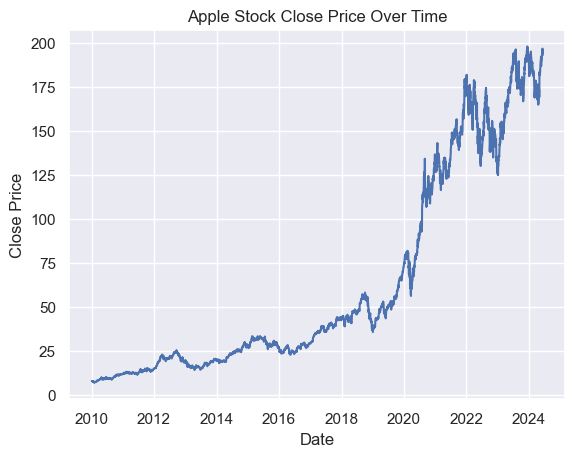

In [6]:
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'Apple Stock Close Price Over Time')

# Selecting the features & Creating the targets

In [7]:
df['Return'] = df['Adj Close'].pct_change(60).shift(-60)
list_of_features = ['High', 'Low', 'Close', 'Volume', 'Adj Close']
X = df[list_of_features]
# if the return is positive, classify it as 1, else as 0
y = np.where(df.Return > 0, 1, 0)

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600,0.098080
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800,0.100709
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000,0.130445
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200,0.137525
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400682,447610800,0.135013
...,...,...,...,...,...,...,...
2024-06-04,194.639999,195.320007,193.029999,194.350006,194.350006,47471400,NaN
2024-06-05,195.399994,196.899994,194.869995,195.869995,195.869995,54156800,NaN
2024-06-06,195.690002,196.500000,194.169998,194.479996,194.479996,41181800,NaN


# Splitting the Data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=423,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2543, 5)
(1090, 5)
(2543,)
(1090,)


# The Model 

In [10]:
treeClassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)
treeClassifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

In [11]:
y_pred = treeClassifier.predict(X_test)

# Classification Report 

In [12]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.21      0.34       341
           1       0.73      0.97      0.83       749

    accuracy                           0.73      1090
   macro avg       0.75      0.59      0.59      1090
weighted avg       0.75      0.73      0.68      1090

